# Multi Cancer Identification And Segmentation
## Problem Definition:

### Using ultrasound scans we are trying to:

* Classify the scan to:

    1.1 Brain scan

      1.1.1 Classify Brain Scan to:

          a. Tumor

              a.1. Segment the tumor

          b. No Tumor

    1.2 Breast scan

      1.2.1 Classify Breast Scan to:

          a. Normal

          b. Bengin

              b.1. Segment the tumor

          c. Malignant

              c.1. Segment the tumor
              

# Dataset
### You can check the dataset though this [link](https://drive.google.com/drive/folders/1RWwtUBCTevqL4TH8husUobaULWCYKnHd?usp=sharing)

Our data is organized as follows:

* Dataset_CV_Project/
  - Dataset_CV_Project/  
      - Brain scans/
            ├── No tumor/
                ├── Test/
                └── Train/
            |
            └── Tumor/
                ├── TEST_masks/
                ├── TRAIN_masks/
                ├── Test/
                └── Train/
        
      - Breast scans/
            ├── benign
                ├── Test/
                └── Train/
            |
            ├── malignant
                ├── Test/
                └── Train/
            |
            └── normal
                ├── Test/
                └── Train/

# Import necessary liberaries

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from PIL import Image
import os

In [ ]:

import sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Image Preprocessing

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Computer Vision/brain/classification/Functions')

from image_preprocessing_brain import image_preprocessing
from load_images_brain import load_images, read_images_from_dataFrame

# Image Preprocessing
* Preprocessing is a very important and main step in image processing, as scanned images are usually displayed in gray scale or color and also they <b>suffer from noise</b>

* <b>Noise removal and edge detection</b> are the two most important steps in processing any digital images to improve the
information in the picture so that it can be easily understood and to make it suitable and readable for any machine working on those images.

* That's why, some preprocessing steps are performed on the image.



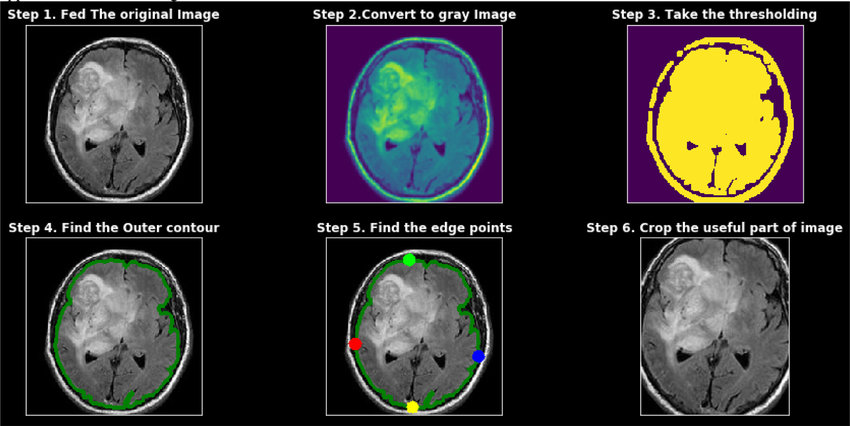

# 2. Classify Scan Brain or Breast

In [ ]:
folder_path = "/content/drive/MyDrive/Computer Vision/sample_test"
images = []
for filename in os.listdir(folder_path):
    img = Image.open(os.path.join(folder_path, filename))
    images.append(img)

In [ ]:
Images_resized = []
images = []
for filename in os.listdir(folder_path):
    images.append(os.path.join(folder_path, filename))
    img = cv2.imread(os.path.join(folder_path, filename))
    # Resize the image to have a fixed shape of (150, 150, 3)
    resized_image = cv2.resize(img, (150, 150))
    Images_resized.append(resized_image)

In [ ]:
df = pd.DataFrame({"images": images})

In [ ]:
pd.set_option('display.max_colwidth', None)
df

,images
0,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y760.jpg
1,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y759.jpg
2,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y764.jpg
3,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y765.jpg
4,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من no502.jpg
5,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من no503.jpg
6,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (400).png
7,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (399).png
8,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (401).png
9,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (404).png


In [ ]:
# 1 for breast,0 for brain.
real_class = [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
print(len(real_class))

16


In [ ]:
brain_breast_classifier = load_model('/content/drive/MyDrive/Computer Vision/brain-breast classification/1st_classification_weights.h5')

In [ ]:
brain_or_breast = brain_breast_classifier.predict(np.array(Images_resized))

1/1 [==============================] - 1s 580ms/step


In [ ]:
# Calculate the accuracy of the predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(real_class, brain_or_breast)
print(f'The Accuracy: {int(accuracy*100)}%')

The Accuracy: 100%


In [ ]:
df['brain_or_breast'] = ['brain' if x == 0 else 'breast' for x in brain_or_breast]

In [ ]:
df

,images,brain_or_breast
0,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y760.jpg,brain
1,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y759.jpg,brain
2,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y764.jpg,brain
3,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y765.jpg,brain
4,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من no502.jpg,brain
5,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من no503.jpg,brain
6,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (400).png,breast
7,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (399).png,breast
8,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (401).png,breast
9,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (404).png,breast


# 3. Brain Scan
## 3.1. Classify Brain Scan (Tumor or No Tumor)


In [ ]:
brainClassifierModel = load_model('/content/drive/MyDrive/Computer Vision/brain/classification/brainClassifier.h5')

In [ ]:
data = df[df['brain_or_breast'] == 'brain']

In [ ]:
data.head()

,images,brain_or_breast
0,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y760.jpg,brain
1,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y759.jpg,brain
2,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y764.jpg,brain
3,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y765.jpg,brain
4,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من no502.jpg,brain


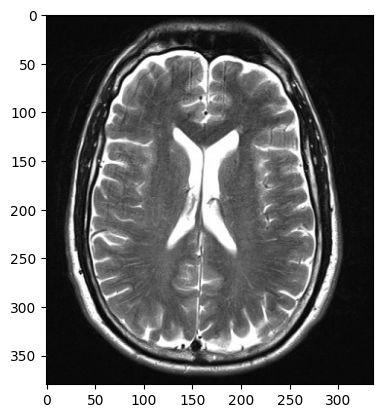

In [ ]:
# Display one image from the data frame
image = cv2.imread(data.images[5])
plt.imshow(image)

In [ ]:
images = read_images_from_dataFrame(data)

In [ ]:
images = np.array(images).astype(np.float32) / 255

In [ ]:
# Use the model to make predictions
predictions = brainClassifierModel.predict(images)
predictions = np.round(predictions)

1/1 [==============================] - 0s 324ms/step


In [ ]:
data['prediction'] = predictions
data['prediction'] = data['prediction'].apply(lambda x: 'Tumor' if x==1 else 'No Tumor')

<ipython-input-22-e752532cc54c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prediction'] = predictions
<ipython-input-22-e752532cc54c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prediction'] = data['prediction'].apply(lambda x: 'Tumor' if x==1 else 'No Tumor')


In [ ]:
data

,images,brain_or_breast,prediction
0,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y760.jpg,brain,Tumor
1,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y759.jpg,brain,Tumor
2,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y764.jpg,brain,Tumor
3,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من y765.jpg,brain,Tumor
4,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من no502.jpg,brain,No Tumor
5,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من no503.jpg,brain,No Tumor


In [ ]:
# # Iterate through the images and their corresponding predictions
# for i in range(len(images)):
#     image = images[i]
#     prediction = predictions[i]

#     # plot the image and its predicted class
#     plt.imshow(image)
#     plt.title(f'label: {prediction}')
#     plt.show()


## 3.2. Segment Tumor

In [ ]:
def bce_loss(y_true, y_pred):
    y_true = tf.keras.backend.cast(y_true, 'float32')
    y_pred = tf.keras.backend.cast(y_pred, 'float32')
    
    return tf.keras.losses.binary_crossentropy(y_true, y_pred)

def dice_loss(y_true, y_pred):
    dice_loss_v = 1 - dice_coef(y_true, y_pred)
    return dice_loss_v

def bce_dice_loss(y_true, y_pred):
    bce_dice_loss_v = bce_loss(y_true, y_pred) + dice_loss(y_true, y_pred)
    return bce_dice_loss_v

def dice_coef(y_true, y_pred, smooth=100):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2 * intersection + smooth) / (union + smooth)

In [ ]:
tumor_data = data[data['prediction'] == 'Tumor']

In [ ]:
test_images = []
for filename in tumor_data['images']:
    image = cv2.imread(filename)
    image = cv2.resize(image, (256, 256))
    test_images.append(image)
test_images = np.asarray(test_images) / 255.0
test_images.shape

(4, 256, 256, 3)

In [ ]:
base_path = '/content/drive/MyDrive/Computer Vision/brain/segmentation'
model_path = base_path + '/best_deeplabv3_model.h5'

segmentation_model = tf.keras.models.load_model(model_path, custom_objects={'bce_dice_loss': bce_dice_loss, 'dice_coef': dice_coef})
predictions = segmentation_model.predict(test_images)

1/1 [==============================] - 1s 1s/step


Image 0 has a tumor at (64, 176) with a width of 16 and a length of 16
Image 1 has a tumor at (205, 191) with a width of 3 and a length of 1
Image 2 has a tumor at (144, 48) with a width of 16 and a length of 32
Image 3 has a tumor at (111, 111) with a width of 33 and a length of 17


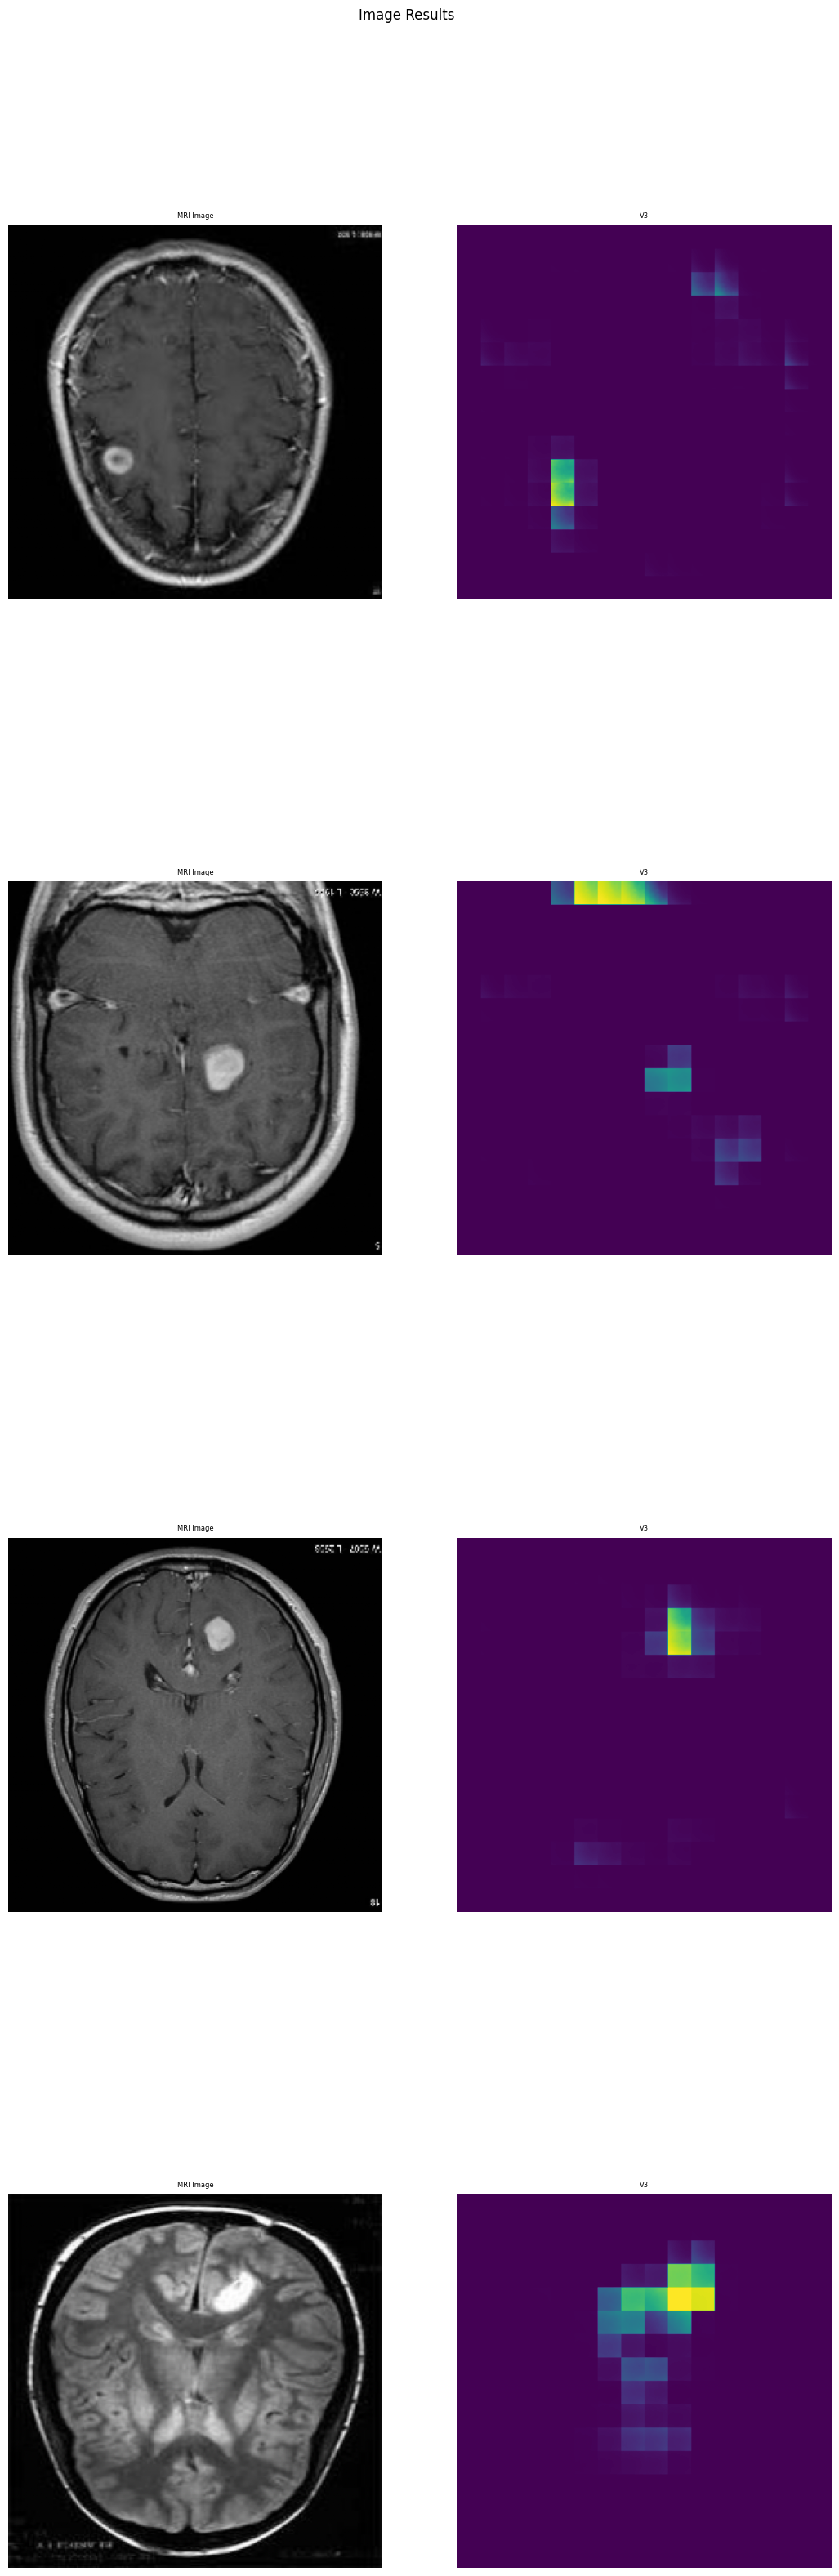

In [ ]:
fig, axs = plt.subplots(len(test_images), 2, figsize=(13, 40))

for i in range(len(test_images)):
    # Original MRI Image
    mri_sm = test_images[i]
    axs[i, 0].imshow(mri_sm)
    axs[i, 0].axis("off")
    axs[i, 0].set_title("MRI Image", fontsize=6)
    
    for j in range(1):
        axs[i, 1].imshow(predictions[i])
        axs[i, 1].axis("off")
        axs[i, 1].set_title('V3', fontsize=6)
        ret,binary = cv2.threshold(predictions[i],.2,1,cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(binary.reshape(256, 256).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        x,y,w,h = cv2.boundingRect(contours[0])
        print(f'Image {i} has a tumor at ({x}, {y}) with a width of {w} and a length of {h}')


plt.suptitle("Image Results", x=0.5, y=0.92)

plt.show()

In [ ]:
def show_images(images, masks):
    plt.figure(figsize=(12, 12))
    for i in range(len(images)):
        plt.subplot(5, 5, i+1)
        image = images[i]
        # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # read mask
        mask = masks[i]
        # sho image and mask
        plt.imshow(image)
        plt.imshow(mask, alpha=0.4)

        plt.axis('off')

    plt.tight_layout()
    plt.show()

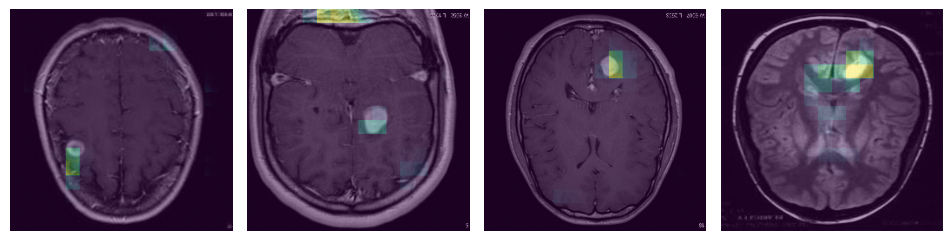

In [ ]:
show_images(list(test_images), list(predictions)[:len(test_images)])

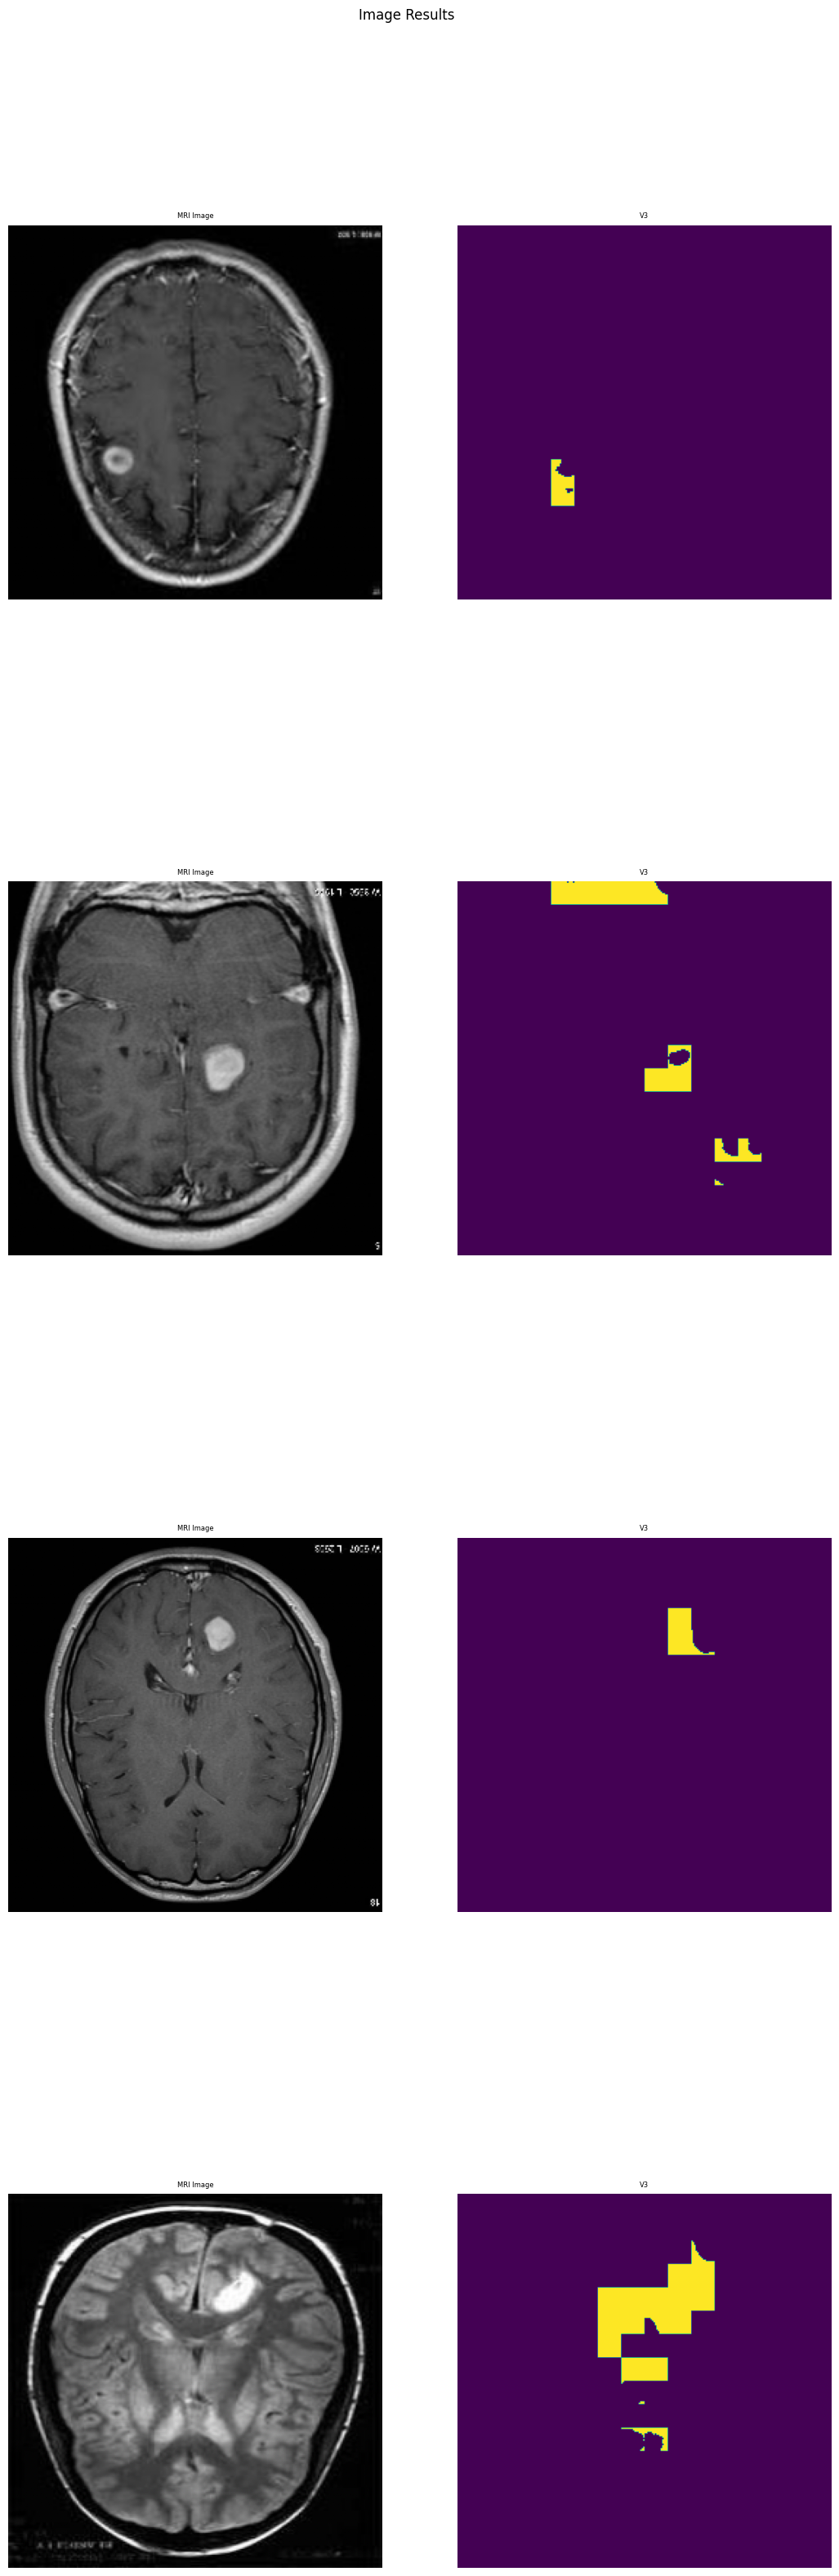

In [ ]:
fig, axs = plt.subplots(len(test_images), 2, figsize=(13, 40))
binaries = []
for i in range(len(test_images)):
    # Original MRI Image
    mri_sm = test_images[i]
    axs[i, 0].imshow(mri_sm)
    axs[i, 0].axis("off")
    axs[i, 0].set_title("MRI Image", fontsize=6)
    
    for j in range(1):
        ret,binary = cv2.threshold(predictions[i],.15,1,cv2.THRESH_BINARY)
        binaries.append(binary)
        axs[i, 1].imshow(binary)
        axs[i, 1].axis("off")
        axs[i, 1].set_title('V3', fontsize=6)


plt.suptitle("Image Results", x=0.5, y=0.92)

plt.show()

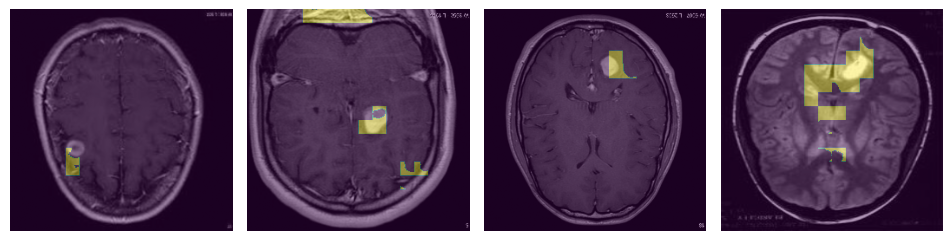

In [ ]:
show_images(list(test_images), binaries[:len(test_images)])

# 4. Breast Scan
## 4.1. Classify Breast Scan (Normal, Bengin, or Malignant)


In [ ]:
data_2 = df[df['brain_or_breast'] == 'breast']

In [ ]:
data_2

,images,brain_or_breast
6,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (400).png,breast
7,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (399).png,breast
8,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (401).png,breast
9,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (404).png,breast
10,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (194).png,breast
11,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (185).png,breast
12,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (200).png,breast
13,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (181).png,breast
14,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من normal (108).png,breast
15,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من normal (104).png,breast


In [ ]:
breastClassifier = load_model('/content/drive/MyDrive/Computer Vision/breast/classification/breastClassifier.h5')

In [ ]:
classifier = []
for i in range(data_2.shape[0]):
  # get the image
  image = data_2.iloc[i,0]
  # resize the image
  image = cv2.imread(image)
  image = cv2.resize(image, (150, 150), interpolation=cv2.INTER_LINEAR)
  image = np.array(image).astype(np.float32) / 255

  # expand the image dimention to be able to make the prediction
  image = np.expand_dims(image, axis=0)

  # classify breast images
  # blurred = cv2.GaussianBlur(image, (5,5), 0)
  pred = breastClassifier.predict(image)
  pred = np.round(pred)
  # print(pred)
  # print("position of 1:", np.where(pred==1))
  label = (np.where(pred==1)[1])

  if label == 0:
    classifier.append('Benign')
  elif label == 1:
    classifier.append('Malignant')
  else:
    classifier.append('Normal')

1/1 [==============================] - 0s 55ms/step


In [ ]:
data_2['Classifier'] = classifier

<ipython-input-19-79e65b0a33f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Classifier'] = classifier


In [ ]:
data_2

,images,brain_or_breast,Classifier
6,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (400).png,breast,Benign
7,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (399).png,breast,Benign
8,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (401).png,breast,Benign
9,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (404).png,breast,Benign
10,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (194).png,breast,Malignant
11,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (185).png,breast,Benign
12,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (200).png,breast,Benign
13,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (181).png,breast,Malignant
14,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من normal (108).png,breast,Benign
15,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من normal (104).png,breast,Normal


## 4.2. Segment Tumor

In [ ]:
sys.path.append('/content/drive/MyDrive/Computer Vision/breast/segmentation/functions')

In [ ]:
from seg_lib import dice_coef_np, selective_unet
from load_data import compatible_img
from google.colab.patches import cv2_imshow
from plots import plot_one_mask

In [ ]:
model = selective_unet()
model.load_weights('/content/drive/MyDrive/Computer Vision/breast/segmentation/skunet_weights_100.h5')

In [ ]:
tumors_data = data_2[data_2['Classifier'] != 'Normal']

In [ ]:
tumors_data

,images,brain_or_breast,Classifier
6,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (400).png,breast,Benign
7,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (399).png,breast,Benign
8,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (401).png,breast,Benign
9,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من benign (404).png,breast,Benign
10,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (194).png,breast,Malignant
11,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (185).png,breast,Benign
12,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (200).png,breast,Benign
13,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من malignant (181).png,breast,Malignant
14,/content/drive/MyDrive/Computer Vision/sample_test/نسخة من normal (108).png,breast,Benign


1/1 [==============================] - 0s 463ms/step
Image 0 has a tumor at (61, 21) with a width of 108 and a length of 55


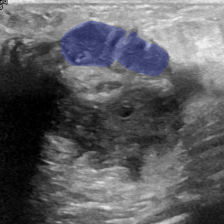

1/1 [==============================] - 1s 513ms/step
Image 1 has a tumor at (62, 37) with a width of 114 and a length of 75


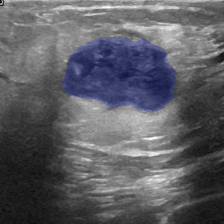

1/1 [==============================] - 0s 305ms/step
Image 2 has a tumor at (75, 17) with a width of 65 and a length of 65


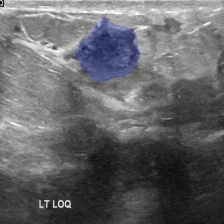

1/1 [==============================] - 0s 305ms/step
Image 3 has a tumor at (29, 18) with a width of 165 and a length of 81


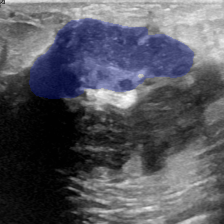

1/1 [==============================] - 0s 311ms/step
Image 4 has a tumor at (46, 41) with a width of 72 and a length of 64


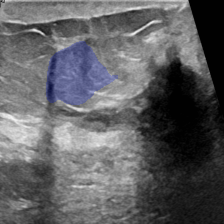

1/1 [==============================] - 0s 310ms/step
Image 5 has a tumor at (43, 30) with a width of 105 and a length of 97


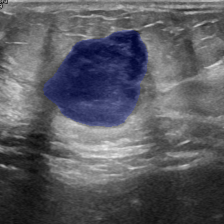

1/1 [==============================] - 0s 305ms/step
Image 6 has a tumor at (110, 76) with a width of 56 and a length of 22


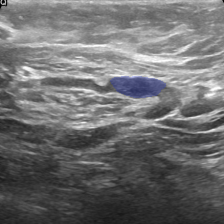

1/1 [==============================] - 0s 316ms/step
Image 7 has a tumor at (81, 40) with a width of 61 and a length of 42


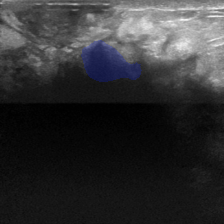

1/1 [==============================] - 1s 523ms/step
Image 8 has a tumor at (107, 55) with a width of 33 and a length of 37


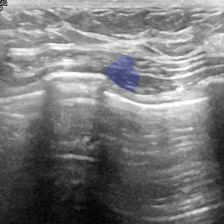

In [ ]:
for i in range(tumors_data.shape[0]):
  image = tumors_data.iloc[i,0]
  image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
  image = compatible_img(image)
  image_scaled = np.array(image).astype(np.float32) / 255
  img = np.expand_dims(image_scaled, 0)
  mask_predicted = model.predict(img).squeeze().round()
  ret,binary = cv2.threshold(mask_predicted,.2,1,cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(binary.reshape(224, 224).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  x,y,w,h = cv2.boundingRect(contours[0])
  print(f'Image {i} has a tumor at ({x}, {y}) with a width of {w} and a length of {h}')
  plot_one_mask(image, mask_predicted)